# Disney data analysis

#### Given a disney movies data, answer the following questions:
* In what month do the most movies come out?
* How long does it take to watch all the Disney movies in a row?
* Which production company produced the most movies?
* Is there any correlation between the amount of the budget and the year of release?

First, We import all the necessary libraries:

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

This function is supposed to load the Json Data: 

In [2]:
def load_data(title):
    with open(title, encoding="utf-8") as f:
        return json.load(f)

In [3]:
movies = load_data("disney_data.json") # load the data

Excellent, we can get started!
### Q1: In what month do the most movies come out?

In [4]:
month_counter = [0] * 12

for movie in movies: 
    if 'Release Date (date-time)' in movie:
        for date in movie['Release Date (date-time)']:
            month = date.split('-')[1]
            if month != 'None':
                month_counter[int(month)-1] += 1 #Increase the month index by 1

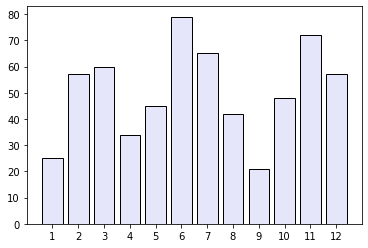

Answer: June and November


In [5]:
plt.bar(range(1,13), month_counter, color='lavender', edgecolor='black')
plt.xticks(range(1,13))
plt.show()

print("Answer: June and November")

### Q2: How long does it take to watch all the Disney movies in a row?

In [6]:
minutes_sum = 0 
for movie in movies:
    if 'Running time (Minutes)' in movie:
        minutes_sum += movie['Running time (Minutes)'] #Add the minute of this movie to the total minutes

In [7]:
#Covert the total minutes to Minutes - Hourse - Minutes Format
days = int(minutes_sum / (24*60))
hours = int((minutes_sum % (24*60))/60)
minutes = minutes_sum % 60

In [8]:
print("Answer: {} days, {} hours and {} minutes \nHave Fun XD".format(days, hours, minutes))

Answer: 29 days, 16 hours and 58 minutes 
Have Fun XD


### Q3: Which production company produced the most movies?

In [9]:
df = pd.read_csv('movie_data.csv')[['Title','Production Company']]

In [10]:
Production_Company_Counter = {}

for Production_Company in df['Production Company']:
    if not pd.isna(Production_Company):
        # Convert string to array 
        Production_Company = Production_Company.replace('[','')
        Production_Company = Production_Company.replace(']','')
        Production_Company = Production_Company.replace("'",'')
        Production_Company = Production_Company.split(',')
        for pc in Production_Company:
            pc = pc.strip()
            if pc != 'Inc.':
                if pc in Production_Company_Counter:
                    Production_Company_Counter[pc] += 1
                else:
                    Production_Company_Counter[pc] = 1
            

Let's look at the distribution of the movies per company:

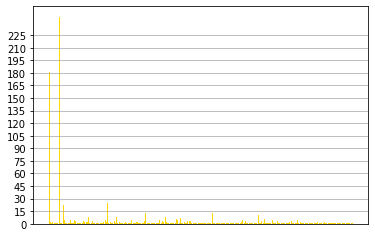

In [11]:
plt.bar(range(0,len(Production_Company_Counter)), list(Production_Company_Counter.values()), color='gold')
plt.yticks(range(0,len(Production_Company_Counter),15))
plt.xticks([])
plt.grid()
plt.show()

It seems unnecessary to show them all in a pie chart, so we will take down all the companies that have not released more than 15 films.

In [12]:
Clean_Production_Company_Counter = {}
for key,value in Production_Company_Counter.items():
    if value >= 15:
        Clean_Production_Company_Counter[key] = value

In [13]:
companies = list(Clean_Production_Company_Counter.keys())
movies_number = list(Clean_Production_Company_Counter.values()) 

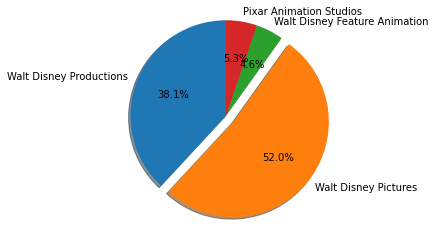

Answer: 'Walt Disney Pictures' by far.


In [14]:
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(movies_number, explode=explode, labels=companies, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

print("Answer: 'Walt Disney Pictures' by far.")

### Q4: Is there any correlation between the amount of the budget and the year of release?

In [15]:
Budget_Sum_Per_Year = len(range(1937,2021 + 1)) * [0]
Movies_Per_Year = len(range(1937,2021 + 1)) * [0]

In [16]:
for movie in movies:
    if 'Release Date (date-time)' in movie and 'Budget' in movie:
        year = movie['Release Date (date-time)'][0].split('-')[0]
        if year != 'None':
            Movies_Per_Year[int(year)-1937] += 1
            if isinstance(movie['Budget'],list):
                Budget_Sum_Per_Year[int(year)- 1937] +=  sum(movie['Budget']) #Add sum of movies budget to total by year index
            else:
                Budget_Sum_Per_Year[int(year)- 1937] +=  movie['Budget'] #Add movie budget to total by year index
            

C:\Users\User\anaconda3\envs\tt\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


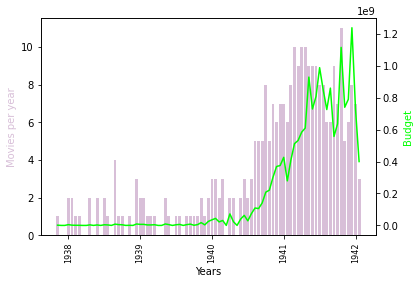

In [17]:
#Now we are going to plot two graphs: 
#One in light purple for the number of films per year and one in green for the amount of budget

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(range(1937,2021 + 1), Movies_Per_Year, color='thistle')
ax2.plot(range(1937,2021 + 1), Budget_Sum_Per_Year, color='lime')

ax1.set_xlabel('Years')
ax1.set_ylabel('Movies per year', color='thistle')
ax2.set_ylabel('Budget', color='lime')
ax1.set_xticklabels(range(1937,2021 + 1), rotation='vertical', size=8)

plt.show()

An interesting graph, several conclusions can be drawn:
* It seems that the more movies there are, the more budget there is (obviously).
* Until 1943 the budget seemed to remain more or less the same no matter how many films were made.
* It seems that the rate of increase in the budget is lower than the rate of increase in movies.

The third conclusion is that the average budget per film has been rising- we are going to check this with the help of another graph.

In [18]:
avg_budget = list(np.divide(Budget_Sum_Per_Year, Movies_Per_Year)) #❤️!!! 0/0 = Nan
avg_budget = [i if i > 0 else 0 for i in avg_budget] #Replace Nan with 0

C:\Users\User\anaconda3\envs\tt\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


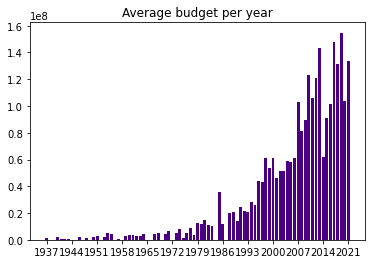

In [20]:
plt.bar(range(1937,2021 + 1), avg_budget, color='indigo')
plt.xticks(range(1937,2021 + 1,7))
plt.title("Average budget per year")

plt.show()

Now we can say for sure: since 1995 the average budget per movie has increased significantly (probably because Disney has established itself as a big company with a big budget). <br/>
## Done!

![](https://media3.giphy.com/media/8n8bWePc8cQs8/200.webp?cid=ecf05e47vdgp871wzrsy6msz1yhnbpsnmgtjruktizjfmhnl&rid=200.webp&ct=g)